In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
log1 = pd.read_csv("processed/CSVLog_20170919_175135.csv", encoding='ISO-8859-1')
log1.head()

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Fuel rate (gal/hr),Engine RPM (RPM),Time since engine start (sec),Acceleration (ft/så_),Acceleration (Avg) (ft/så_),Intake manifold absolute pressure (inHg),...,Ambient air temperature (F),Barometric pressure (inHg),Driver's demand engine - percent torque (%),Actual engine - percent torque (%),Engine reference torque (lbÛ¢ft),Mass air flow rate (lb/min),Trip Duration (min),Trip Distance (miles),Altitude (ft),Absolute throttle position (%)
0,0.000,34.02115,-118.2907,0.0,0.716810,1100.75,28,0.0,0.0,17.61656,...,0,29.5301,0,0,0,0,0.032436,0.0,167.3228,18.03922
1,0.908,34.02118,-118.2907,0.0,0.718569,1089.00,28,0.0,0.0,17.72420,...,0,29.5301,0,0,0,0,0.048785,0.0,150.9186,18.03922
2,1.930,34.02119,-118.2907,0.0,0.686906,1067.00,28,0.0,0.0,17.35057,...,0,29.5301,0,0,0,0,0.062159,0.0,137.7953,18.03922
3,2.914,34.02119,-118.2907,0.0,0.678111,1045.25,28,0.0,0.0,17.39642,...,0,29.5301,0,0,0,0,0.076915,0.0,134.5144,18.03922
4,3.908,34.02119,-118.2907,0.0,0.657882,1032.00,33,0.0,0.0,17.24543,...,0,29.5301,0,0,0,0,0.097752,0.0,137.7953,17.64706


In [14]:
log1.columns

Index(['Time (sec)', ' Latitude (deg)', ' Longitude (deg)',
       ' Vehicle speed (MPH)', ' Fuel rate (gal/hr)', ' Engine RPM (RPM)',
       ' Time since engine start (sec)', ' Acceleration (ft/så_)',
       ' Acceleration (Avg) (ft/så_)',
       ' Intake manifold absolute pressure (inHg)', ' Engine Power (hp)',
       ' Engine Torque (lbÛ¢ft)', ' A/F Commanded', ' A/F Actual',
       ' Instant fuel economy (MPG)', ' Magnetometer Z (åµT)',
       ' Magnetometer Y (åµT)', ' Magnetometer X (åµT)',
       ' Engine coolant temperature (F)',
       ' Fuel/Air commanded equivalence ratio', ' Ambient air temperature (F)',
       ' Barometric pressure (inHg)',
       ' Driver's demand engine - percent torque (%)',
       ' Actual engine - percent torque (%)',
       ' Engine reference torque (lbÛ¢ft)', ' Mass air flow rate (lb/min)',
       ' Trip Duration (min)', ' Trip Distance (miles)', ' Altitude (ft)',
       ' Absolute throttle position (%)'],
      dtype='object')

In [42]:
t = log1['Time (sec)']

In [43]:
x = log1[' Vehicle speed (MPH)']
y = log1[' Engine RPM (RPM)']
z = log1[' Engine Torque (lb•ft)']

In [44]:
speed = pd.Series(x.values, index=t.values)
rpm = pd.Series(y.values, index = t.values)
torque = pd.Series(z.values, index = t.values)

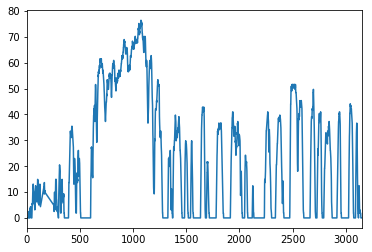

In [46]:
speed.plot()

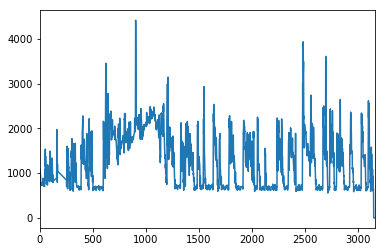

In [47]:
rpm.plot()

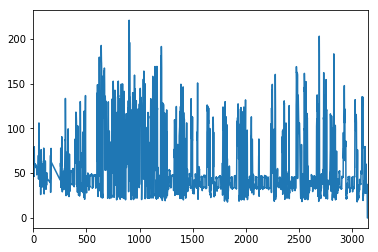

In [49]:
torque.plot()

In [76]:
# Normalize TS from 0 to 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler = scaler.fit(speed.values)
speed_normalized = scaler.transform(speed.values)
speed_normalized_series = pd.Series(speed_normalized, index = t)

scaler = scaler.fit(rpm.values)
rpm_normalized = scaler.transform(rpm.values)
rpm_normalized_series = pd.Series(rpm_normalized, index = t)

scaler = scaler.fit(torque.values)
torque_normalized = scaler.transform(torque.values)
torque_normalized_series = pd.Series(torque_normalized, index = t)

/Users/nicole/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/nicole/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/nicole/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

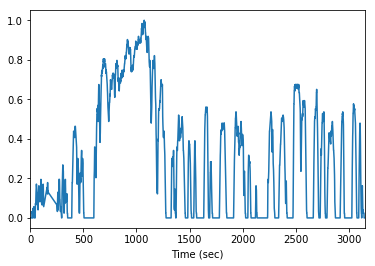

In [77]:
speed_normalized_series.plot()

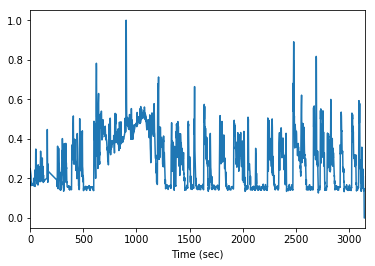

In [78]:
rpm_normalized_series.plot()

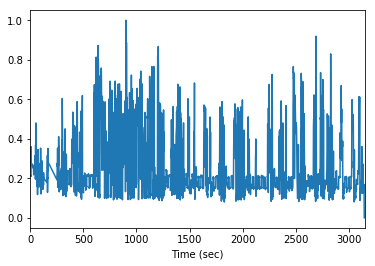

In [79]:
torque_normalized_series.plot()

In [82]:
print(euclid_dist(speed_normalized_series, rpm_normalized_series))
print(euclid_dist(speed_normalized_series, torque_normalized_series))

11.3818665476
15.6309849845


In [90]:
DTWDistance(speed_normalized_series.values, rpm_normalized_series.values)

5.6858709669177676

In [91]:
DTWDistance(speed_normalized_series.values, torque_normalized_series.values)

7.2729840466015476

In [94]:
DTWDistance_Fast(speed_normalized_series.values, rpm_normalized_series.values, 4)

10.3694332537668

In [95]:
DTWDistance_Fast(speed_normalized_series.values, torque_normalized_series.values, 4)

14.244860433930134

In [80]:
def euclid_dist(t1,t2):
    return sqrt(sum((t1-t2)**2))

In [57]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [93]:
def DTWDistance_Fast(s1, s2,w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [53]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return sqrt(LB_sum)


In [2]:
from sklearn.metrics import classification_report

def knn(train,test,w):
    preds=[]
    for ind,i in enumerate(test):
        min_dist=float('inf')
        closest_seq=[]
        #print ind
        for j in train:
            if LB_Keogh(i[:-1],j[:-1],5)<min_dist:
                dist=DTWDistance(i[:-1],j[:-1],w)
                if dist<min_dist:
                    min_dist=dist
                    closest_seq=j
        preds.append(closest_seq[-1])
    return classification_report(test[:,-1],preds)
